# Flair-It Week 4
#### Cade, Tyler, Alex

## How can we extract post data from the Reddit API?

This code block is setting up PRAW with a Reddit API connection in the reddit variable. Using that, we can create an instance of the "udub" subreddit.

In [ ]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reddit = praw.Reddit(
    # client_id="ClientID",
    # client_secret="API Key",
    # user_agent="Username",
    
)

subreddit = reddit.subreddit("udub")

count = 0
new = []
hot = []
top = []
rising = []
controversial = []

This section is extracting post data for each of the post pagination categories: New, Hot, Top, Rising, and Controversial. The posts are saved in a dataframe with post information including post ID, post title, body text, flair if available, and post url, number of comments, and number of votes.

In [ ]:
for submission in subreddit.new(limit=None):
    new.append([
        submission.id, submission.title, submission.selftext, 
        submission.link_flair_text, submission.url,
        submission.num_comments, submission.score
    ])

df_new = pd.DataFrame(new, columns=['ID', 'Title', 'Text', 'Flair', 'URL', 'Comments', 'Votes'])

In [ ]:
for submission in subreddit.hot(limit=None):
    hot.append([
        submission.id, submission.title, submission.selftext, 
        submission.link_flair_text, submission.url,
        submission.num_comments, submission.score
    ])

df_hot = pd.DataFrame(hot, columns=['ID', 'Title', 'Text', 'Flair', 'URL', 'Comments', 'Votes'])

In [ ]:
for submission in subreddit.top(limit=None):
    top.append([
        submission.id, submission.title, submission.selftext, 
        submission.link_flair_text, submission.url,
        submission.num_comments, submission.score
    ])

df_top = pd.DataFrame(top, columns=['ID', 'Title', 'Text', 'Flair', 'URL', 'Comments', 'Votes'])

In [ ]:
for submission in subreddit.rising(limit=None):
    rising.append([
        submission.id, submission.title, submission.selftext, 
        submission.link_flair_text, submission.url,
        submission.num_comments, submission.score
    ])

df_rising = pd.DataFrame(rising, columns=['ID', 'Title', 'Text', 'Flair', 'URL', 'Comments', 'Votes'])

In [ ]:
for submission in subreddit.controversial(limit=None):
    controversial.append([
        submission.id, submission.title, submission.selftext, 
        submission.link_flair_text, submission.url,
        submission.num_comments, submission.score
    ])

df_controversial = pd.DataFrame(controversial, columns=['ID', 'Title', 'Text', 'Flair', 'URL', 'Comments', 'Votes'])

By concatenating all of the post dataframes, we created an aggregate dataframe of all the posts. Using drop_duplicates on the post ID gets rid of any post that might exist in multiple dataframes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_csv("df_new.csv")
df_controversial = pd.read_csv("df_controversial.csv")
df_hot = pd.read_csv("df_hot.csv")
df_rising = pd.read_csv("df_rising.csv")
df_top = pd.read_csv("df_top.csv")

# Combine all dataframes
df_new['Category'] = 'new'
df_hot['Category'] = 'hot'
df_top['Category'] = 'top'
df_rising['Category'] = 'rising'
df_controversial['Category'] = 'controversial'

df_all = pd.concat([df_new, df_hot, df_top, df_rising, df_controversial])
df_all = df_all.drop_duplicates(subset='ID')

df_all.to_csv('df_all.csv')

df_all


,ID,Title,Text,Flair,URL,Comments,Votes,Category
0,1c7kf12,Any cool stores near the UW?,I want to kill a couple of hours or so at shop...,NaN,https://www.reddit.com/r/udub/comments/1c7kf12...,2,2,new
1,1c7h6vu,Suzzallo Starbucks Deals,Do the campus starbucks (more specially Suzzal...,NaN,https://www.reddit.com/r/udub/comments/1c7h6vu...,3,0,new
2,1c7ezoi,UW or CWRU (case western) for pre med?,Pre-med with intended major: Global Affairs/In...,Advice,https://www.reddit.com/r/udub/comments/1c7ezoi...,1,0,new
3,1c7ez05,Full size bed frame for free,Getting rid of a bed frame. It will be taken a...,NaN,https://www.reddit.com/r/udub/comments/1c7ez05...,2,1,new
4,1c7cqxb,How UW investigates sexual assault allegations...,NaN,NaN,https://www.seattletimes.com/seattle-news/law-...,0,3,new
...,...,...,...,...,...,...,...,...
991,18y1jd6,Does anyone have CS 122 Assignment Prompts?,I'm looking to work ahead in CS122 and start o...,NaN,https://www.reddit.com/r/udub/comments/18y1jd6...,5,0,controversial
992,18jccxx,Do I need an associate degree to transfer?,I know exactly which classes I want to do in c...,Advice,https://www.reddit.com/r/udub/comments/18jccxx...,7,0,controversial
993,184zjj8,Major Options,Hi! i’m thinking about pursuing the informatic...,NaN,https://www.reddit.com/r/udub/comments/184zjj8...,6,0,controversial
994,179dpxa,Selling up to 3 Dawg Pack tickets for Arizona ...,"dm if interested\n\ngiven all the scams, i'll ...",NaN,https://www.reddit.com/r/udub/comments/179dpxa...,1,0,controversial


In total, we have 2909 unique posts.

## Primary Hypothesis: Does the average length of the body/Title significantly differ across different data sources

In this hypothesis we are wondering if the data source of the post influences the likelihood of a post being longer or shorter. For example some categories reddit has are new, hot, top, rising, and controversial and thus there is a potential that certain types of post length may cluster into certain data sources primarily due to psychological or behavioral actions. For example posts that are controversial may be longer due to the need for dense and very detailed accounts of the controversy while posts that are hot/top might be shorter as it allows for the user to more easily digest the content.

The method we have chosen to help solve and gain more insight into this hypothesis is through comparing cluster profiels pariculary the data source clusters which include (new, hot, top, rising, and controversial). In this process we have opted to remove posts that have zero Text length as we felt they may skew the results and because they have no text we would be unable to train models on that text. Alongside this we do have to take into consideration there may be duplicate posts between these different data sources due to how the PRAW/Reddit API works.

In [2]:
Text_Sizes = []

Lengths_new = df_new['Text'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_new', Lengths_new.min(), Lengths_new.max(), Lengths_new.mean().round(),Lengths_new.median()])


Lengths_hot = df_hot['Text'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_hot', Lengths_hot.min(), Lengths_hot.max(), Lengths_hot.mean().round(),Lengths_hot.median()])

Lengths_top = df_top['Text'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_top', Lengths_top.min(), Lengths_top.max(), Lengths_top.mean().round(),Lengths_top.median()])

Lengths_rising = df_rising['Text'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_rising', Lengths_rising.min(), Lengths_rising.max(), Lengths_rising.mean().round(),Lengths_rising.median()])

Lengths_controversial = df_controversial['Text'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_controversial', Lengths_controversial.min(), Lengths_controversial.max(), Lengths_controversial.mean().round(),Lengths_controversial.median()])

df_Text_Sizes = pd.DataFrame(Text_Sizes, columns=['Data_Source', 'Min', 'Max', 'Mean','Median'])

df_Text_Sizes.head(5)

,Data_Source,Min,Max,Mean,Median
0,df_new,3,5921,392.0,266.0
1,df_hot,3,5921,413.0,280.0
2,df_top,1,13200,204.0,3.0
3,df_rising,3,1866,336.0,123.0
4,df_controversial,3,4886,381.0,210.0


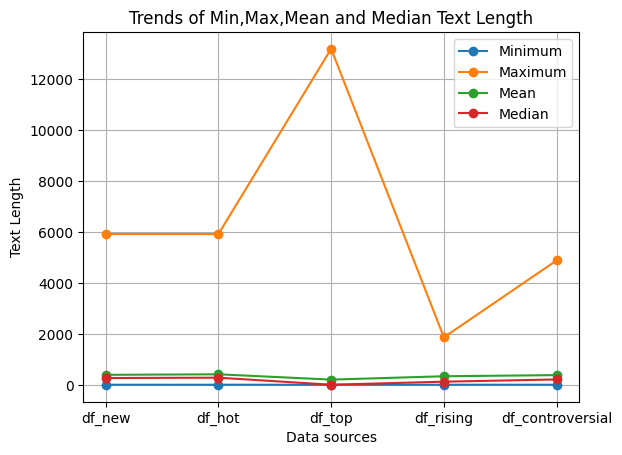

In [3]:
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Min'], marker='o', label='Minimum')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Max'], marker='o', label='Maximum')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Mean'], marker='o', label='Mean')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Median'], marker='o', label='Median')



# Adding labels and title
plt.xlabel('Data sources')
plt.ylabel('Text Length')
plt.title('Trends of Min,Max,Mean and Median Text Length')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [4]:
Text_Sizes = []

Lengths_new = df_new['Title'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_new', Lengths_new.min(), Lengths_new.max(), Lengths_new.mean().round(),Lengths_new.median()])


Lengths_hot = df_hot['Title'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_hot', Lengths_hot.min(), Lengths_hot.max(), Lengths_hot.mean().round(),Lengths_hot.median()])

Lengths_top = df_top['Title'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_top', Lengths_top.min(), Lengths_top.max(), Lengths_top.mean().round(),Lengths_top.median()])

Lengths_rising = df_rising['Title'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_rising', Lengths_rising.min(), Lengths_rising.max(), Lengths_rising.mean().round(),Lengths_rising.median()])

Lengths_controversial = df_controversial['Title'].apply(lambda x: len(str(x))).replace(0, pd.NA).dropna()
Text_Sizes.append(['df_controversial', Lengths_controversial.min(), Lengths_controversial.max(), Lengths_controversial.mean().round(),Lengths_controversial.median()])

df_Text_Sizes = pd.DataFrame(Text_Sizes, columns=['Data_Source', 'Min', 'Max', 'Mean','Median'])

df_Text_Sizes.head(5)

,Data_Source,Min,Max,Mean,Median
0,df_new,4,298,39.0,33.0
1,df_hot,7,298,38.0,33.0
2,df_top,2,289,46.0,37.0
3,df_rising,11,109,37.0,28.0
4,df_controversial,2,253,46.0,38.0


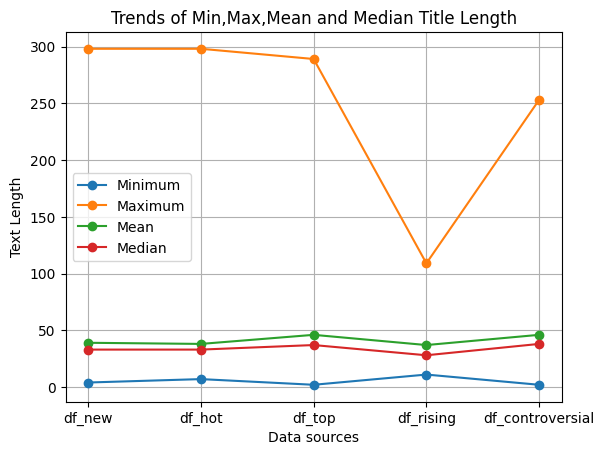

In [5]:
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Min'], marker='o', label='Minimum')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Max'], marker='o', label='Maximum')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Mean'], marker='o', label='Mean')
plt.plot(df_Text_Sizes['Data_Source'], df_Text_Sizes['Median'], marker='o', label='Median')



# Adding labels and title
plt.xlabel('Data sources')
plt.ylabel('Text Length')
plt.title('Trends of Min,Max,Mean and Median Title Length')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Overall the main results I found through this analysis is although text and title max length vary quite heavily the mean/median length of these posts text and title don't vary. Because of this finding I believe there isn't any large text length variations between data sources that would influence our ability to train our model.

## Among the entire dataset of posts, how frequently are they flaired?

Given our preliminary data analysis on a small subset of our data, we expect the split of non-flaired posts to flaired posts to be about 60-40 percent.

### How can we isolate the flaired and non-flaired posts?

Flaired posts are split up into 10 different flairs on r/udub, and can be tedious to filter through. However, non-flaired posts do not have a value in the 'Flair' column, so we can split up the two categories with isnull() and notnull().

In [6]:
no_flair = df_all[df_all['Flair'].isnull()]
flair = df_all[df_all['Flair'].notnull()]

no_flair.head(5)

,ID,Title,Text,Flair,URL,Comments,Votes,Category
0,1c7kf12,Any cool stores near the UW?,I want to kill a couple of hours or so at shop...,NaN,https://www.reddit.com/r/udub/comments/1c7kf12...,2,2,new
1,1c7h6vu,Suzzallo Starbucks Deals,Do the campus starbucks (more specially Suzzal...,NaN,https://www.reddit.com/r/udub/comments/1c7h6vu...,3,0,new
3,1c7ez05,Full size bed frame for free,Getting rid of a bed frame. It will be taken a...,NaN,https://www.reddit.com/r/udub/comments/1c7ez05...,2,1,new
4,1c7cqxb,How UW investigates sexual assault allegations...,NaN,NaN,https://www.seattletimes.com/seattle-news/law-...,0,3,new
7,1c7alzq,Room sublet,I have a master bedroom available in a 2BR 2BA...,NaN,https://www.reddit.com/r/udub/comments/1c7alzq...,0,2,new


In [7]:
flair.head(5)

,ID,Title,Text,Flair,URL,Comments,Votes,Category
2,1c7ezoi,UW or CWRU (case western) for pre med?,Pre-med with intended major: Global Affairs/In...,Advice,https://www.reddit.com/r/udub/comments/1c7ezoi...,1,0,new
5,1c7c5kx,Which class to take as a Cantonese speaker?,NaN,Academics,https://i.redd.it/vhrozg2chavc1.png,13,16,new
6,1c7bx1f,UW MSDS whatsapp group,If you've been admitted to UW Seattle MSDS for...,Admissions,https://www.reddit.com/r/udub/comments/1c7bx1f...,0,1,new
10,1c78tmk,Mold in Hansee,"Hey,\nI live in Hansee and I have since about ...",Student Life,https://www.reddit.com/r/udub/comments/1c78tmk...,6,22,new
11,1c76s6b,Sleep habit by race (guys only),Do you sleep with a shirt and what's your race...,Poll,https://www.reddit.com/r/udub/comments/1c76s6b...,5,0,new


In [8]:
num_no_flair = len(no_flair)
num_flair = len(flair)

num_no_flair, num_flair

(2019, 891)

In [9]:
num_no_flair * 100 / len(df_all), num_flair * 100 / len(df_all)

(69.38144329896907, 30.61855670103093)

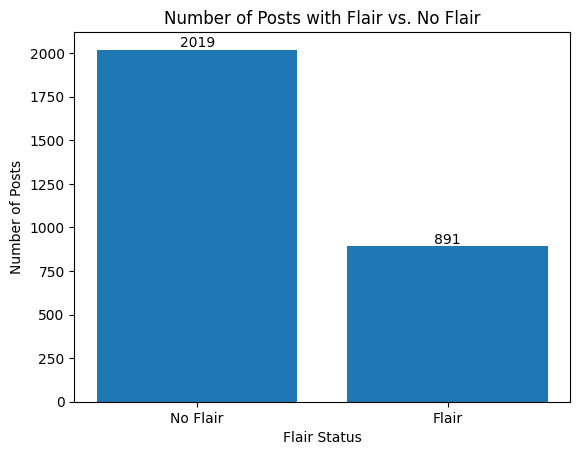

In [10]:
_ = plt.bar(['No Flair', 'Flair'], [num_no_flair, num_flair])
for bar in _:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
_ = plt.xlabel('Flair Status')
_ = plt.ylabel('Number of Posts')
_ = plt.title('Number of Posts with Flair vs. No Flair')

Graphing the ratio allows us to visualize the split, as well as put the percentages into context with the number of total posts per bar.

The 70-30 split differs from our initial hypothesis of a 60-40 split. Because we expanded our analysis from a small subset to posts from five different data categories, additional research needs to be done to identify flaired and non-flaired post trends within all of these categories.

We acknowledge that because of the nature of the Reddit API and of the categories themselves, the number of posts in each category differs, and this has an impact on the ratio of flaired to non-flaired posts.

### Question: How are flairs distributed across different types of Reddit submissions (new, hot, top, rising, controversial)?

#### Hypothesis: The distribution of flairs varies significantly across different submission types, reflecting varying user engagement and content preferences.

Understanding flair distribution can help optimize automatic flair assignment algorithms to better reflect the dynamic nature of Reddit submissions.
This analysis could lead to improved content discoverability and enhanced moderation processes.

Flair: A label used on Reddit to categorize posts.
Datasets: Collections of Reddit posts categorized into new, hot, top, rising, and controversial based on Reddit's sorting algorithms.

Different types of posts might attract different flairs based on the audience's interest and the timing of the post.
The dataset collected provides a comprehensive overview of flair usage across different post types.
Potential bias is that people who flair their post will flair but those that don't will not, and the definition of flairs might be biased to those that flair.

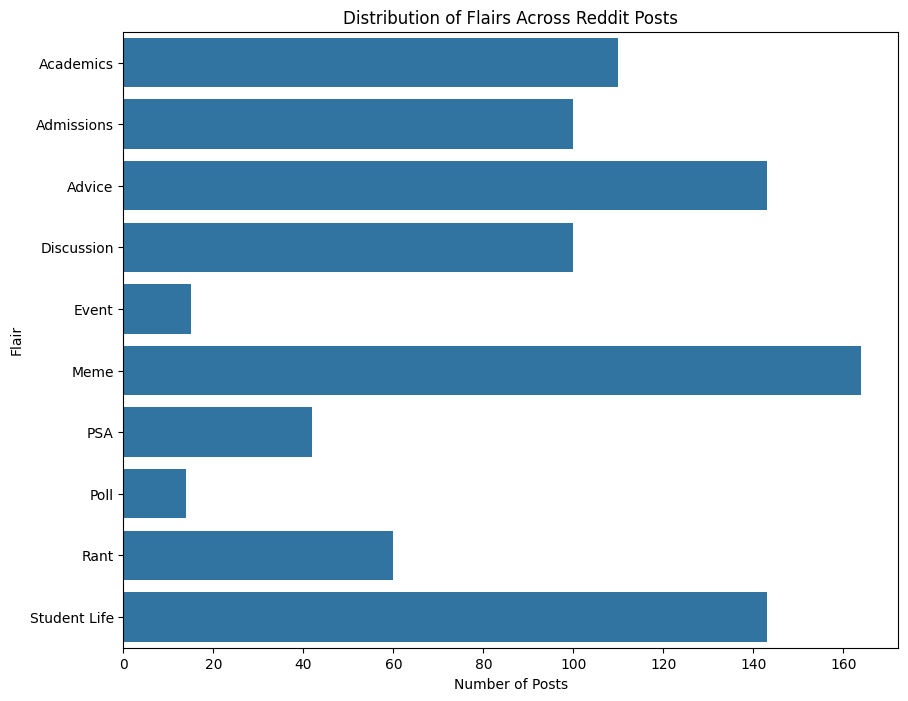

In [11]:
# Count flairs in each category
flair_counts = df_all.groupby(['Flair']).size().reset_index(name='Counts')

# Plot distribution
plt.figure(figsize=(10, 8))
sns.barplot(data=flair_counts, x='Counts', y='Flair')
plt.title('Distribution of Flairs Across Reddit Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Flair')
plt.show()


Here we see in the combined dataset (used to remove duplicate post_id), that the flairs with the most posts are Meme, Student Life, Advice, Academics, and Admissions. This may change based on the time of the API calling of the data and there are still many other posts without flairs but this is generally the trend that we found. The assumption for this result is that, those posts are most likely to be in need of clear categorizing and attention so that the users are able to find the posts and the post creator is able to get more interactions. Meme, especially being flaired a lot maybe has to deal with not-violating the subreddit policy and making sure to flair as Meme.

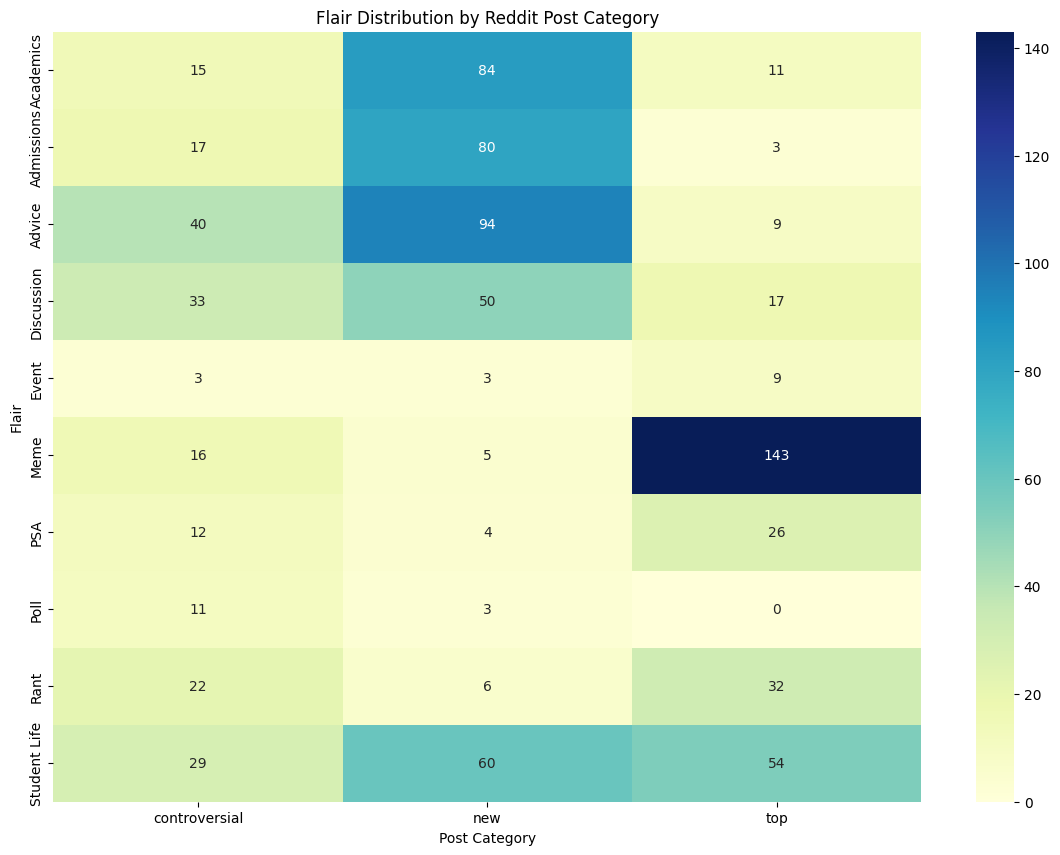

In [12]:
# Create a pivot table for flair counts by category
category_flair_distribution = df_all.pivot_table(index='Flair', columns='Category', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(category_flair_distribution, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Flair Distribution by Reddit Post Category')
plt.xlabel('Post Category')
plt.ylabel('Flair')
plt.show()

Using the combined dataframe by removing duplicate IDs, we can only see what kind of flairs and how many of them exist across the different categories on Reddit like new, hot, controversial, top, and rising. However, we are only getting the flair distribution across the categories for controversial, new, and top only. One few things that stands out would be a lot of Meme flairs in top category and Advice, Admissions, and Academics in new. Showing that people are constantly making posts related to Advice, Admissions, and Academics.

In [13]:
# Instead of dropping duplicates only by 'ID', consider including 'Category' if IDs might repeat across categories
df_all = pd.concat([df_new, df_hot, df_top, df_rising, df_controversial], ignore_index=True)
df_all.drop_duplicates(subset=['ID', 'Category'], inplace=True)  # Using both ID and Category as unique identifiers

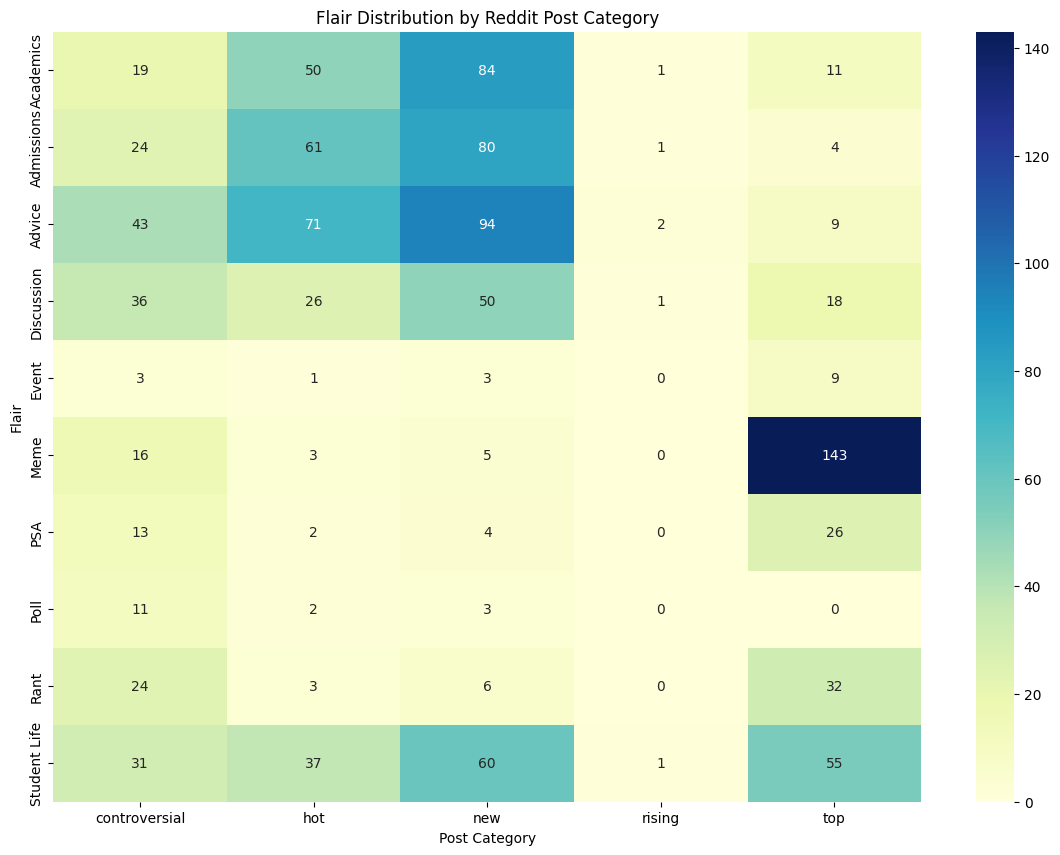

In [14]:
# Create a pivot table for flair counts by category
category_flair_distribution = df_all.pivot_table(index='Flair', columns='Category', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(category_flair_distribution, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Flair Distribution by Reddit Post Category')
plt.xlabel('Post Category')
plt.ylabel('Flair')
plt.show()

Because we weren't able to clearly see the distribution of flairs in all categories, now the df_all was updated to remove duplicated using the set of ID and Category. Here, we still see a similar patterns in top and new as before, but now we have the category, hot. In hot category, Advice seems to be the most flaired, showing that users making posts regarding Advice tends to flair most so that their content can be better seen and understood.

Now that brings us to get curious about the content interaction on differnet by each flairs. Asking the questions, what would be the average votes and number of comments on different flairs?

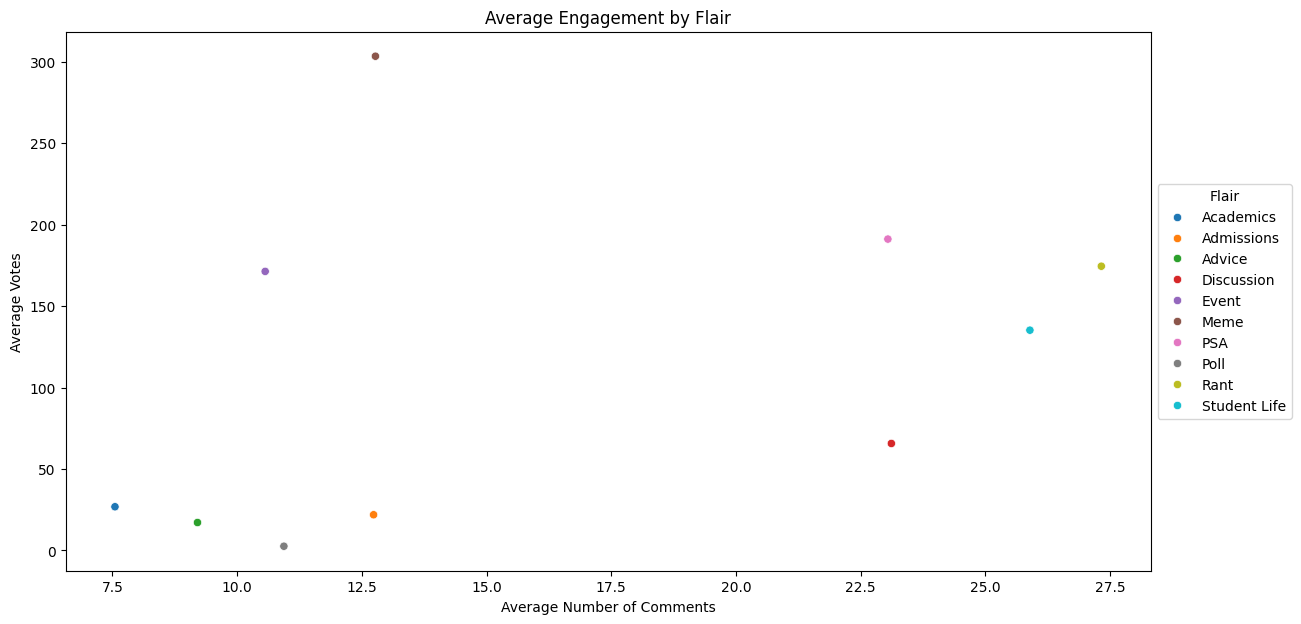

In [15]:
# Calculate average comments and votes by flair
engagement_by_flair = df_all.groupby('Flair').agg({'Comments': 'mean', 'Votes': 'mean'}).reset_index()

# Plotting engagement by flair
plt.figure(figsize=(14, 7))
sns.scatterplot(data=engagement_by_flair, x='Comments', y='Votes', hue='Flair')
plt.title('Average Engagement by Flair')
plt.xlabel('Average Number of Comments')
plt.ylabel('Average Votes')
plt.legend(title='Flair', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Here what we can find in this scatter plot using the average votes and average number of comments, we can find that there are a lot of interactions in flairs Meme, Student Life, Rant, Event, and PSA. Each of them show the characteristics as expected and not all of them are most well flaired posts as we've found above. Some flairs that are well flaired and have lots of interactions would be Student Life and Meme. Other than that, it is interesting that Rant flair tend to get high votes and Comments, possibly showing that a lot of people can relate to those rants. 

To find average text length for each flair, adding a column of body text length for each post will allow us to group posts by flair and find the mean text length. 

In [16]:
df_all.dtypes

ID          object
Title       object
Text        object
Flair       object
URL         object
Comments     int64
Votes        int64
Category    object
dtype: object

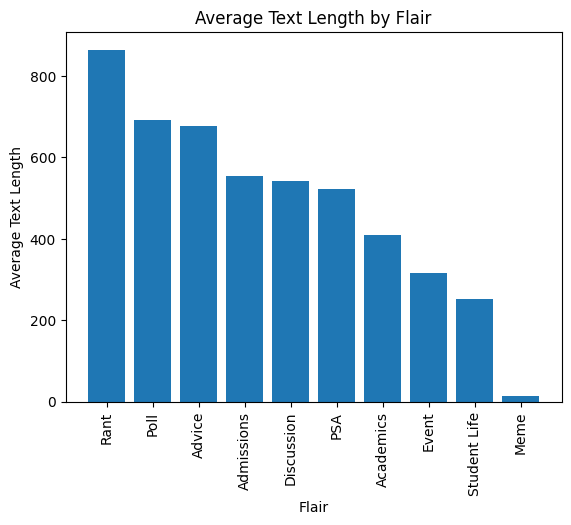

In [17]:
df_all["Text"] = df_all["Text"].astype(str)
df_all["Text Length"] = df_all["Text"].apply(len)
average_text_length = df_all.groupby('Flair')["Text Length"].mean().sort_values(ascending=False)
_ = plt.bar(average_text_length.index, average_text_length)
_ = plt.xlabel('Flair')
_ = plt.ylabel('Average Text Length')
_ = plt.title('Average Text Length by Flair')
_ = plt.xticks(rotation=90)

By graphing this data, we found that posts flaired as Rant, Poll, and Advice contained the longest post text on average.